Tracking density 1023.3 through various wind events. 

In [16]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from salishsea_tools import (nc_tools, viz_tools, gsw_calls)
import numpy.ma as ma
from matplotlib import animation, rc
%matplotlib inline

In [17]:
mesh_mask = nc.Dataset('/home/vdo/MEOPAR/NEMO-forcing/grid/mesh_mask_downbyone2.nc')
new_domain = mesh_mask.variables['tmask'][0,:,334:898,114:398]   
def calc_rho(Sal, TempC, P):
    sqrSal = np.sqrt(Sal)
    R1 = ((((6.536332e-9 * TempC - 1.120083e-6) * TempC + 1.001685e-4)
           * TempC - 9.095290e-3) * TempC + 6.793952e-2) * TempC - 28.263737
    R2 = (((5.3875e-9 * TempC - 8.2467e-7) * TempC + 7.6438e-5)
          * TempC - 4.0899e-3) * TempC + 8.24493e-1
    R3 = (-1.6546e-6 * TempC + 1.0227e-4) * TempC - 5.72466e-3
    SIG = (4.8314e-4 * Sal + R3 * sqrSal + R2) * Sal + R1
    V350P = 1.0 / 1028.1063
    SVA   = -SIG * V350P / (1028.1063 + SIG)
    rho = 28.106331 - SVA / (V350P * (V350P + SVA)) + 1000
    return rho

In [18]:
Jan04 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/LakeJan0.4/SalishSea_1h_20170101_20170107_grid_T.nc')

In [19]:
rc('animation', html='html5')

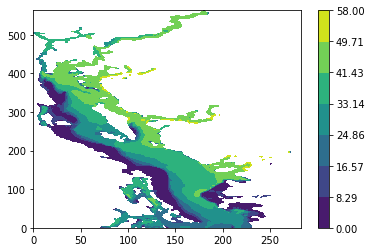

In [33]:
fig, ax = plt.subplots()
diff = ax.contourf(ma.masked_array(list_of_depths[40,:,:], mask = 1-new_domain[0,:,:]),
                  levels = np.linspace(0,58,8))
fig.colorbar(diff,ax=ax)

In [38]:
JanW04 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/LakeJan-0.4/SalishSea_1h_20170101_20170107_grid_T.nc')

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

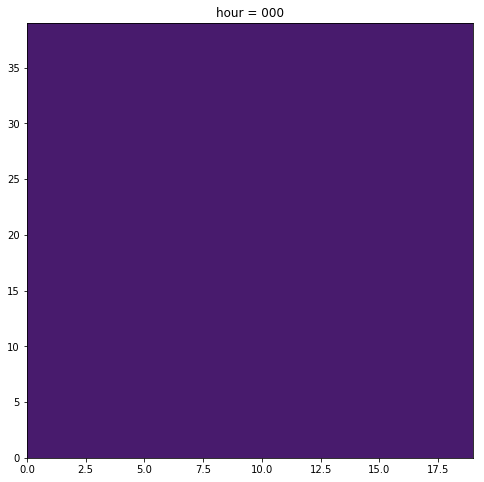

In [23]:
fig,ax = plt.subplots(figsize=(8,8))
def animate30(i):
    ax.clear()
    den = ax.contourf(np.ones((40,20)), 
                      levels = np.linspace(0, 58, 8) #, colors='black'
            )
    ax.set_title('hour = %03d'%(i)) 
    return ax
interval = 0.25#in seconds
ani40 = animation.FuncAnimation(fig,animate30,frames=10,interval=interval*1e+3, repeat=False)
plt.colorbar()
ani40

In [46]:
Jun04 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/LakeJun0.4/SalishSea_1h_20160601_20160607_grid_T.nc')

In [48]:
def animate_one_density(file, rho):
    depth3 = file.variables['deptht'][:]
    saline3 = file.variables['vosaline'][:]
    temp3 = file.variables['votemper'][:]
    a = np.expand_dims(depth, 1).T
    b = np.expand_dims(np.expand_dims(a,2), 3)
    c = np.ones((144,40,564, 284)) * b
    density3 = calc_rho(saline3, temp3, c)
    index3 = (np.abs(density3 - rho)).argmin(axis=1)
    list_of_depths3 = np.zeros((144,564,284))
    for t in range(144):
        for y in range(564):
            for x in range(284):
                list_of_depths3[t,y,x] = depth3[index3[t,y,x]]
    mask_land = 1 - new_domain[0,:,:]
    fig,ax = plt.subplots(figsize=(8,8))
    def animate30(i):
        ax.clear()
        masked_depths = ma.masked_array(list_of_depths3[i,:,:], mask = mask_land)
        den = ax.contourf(masked_depths, 
                      levels = np.linspace(0, 58, 8) #, colors='black'
            )
        #ax.set_ylim(ylims)
        #ax.set_xlim(xlims)
        ax.set_title('hour = %03d'%(i)) 
        return ax

    interval = 0.25#in seconds
    ani40 = animation.FuncAnimation(fig,animate30,frames=144,interval=interval*1e+3, repeat=False)
    return ani40

# June, vtau = 0.4

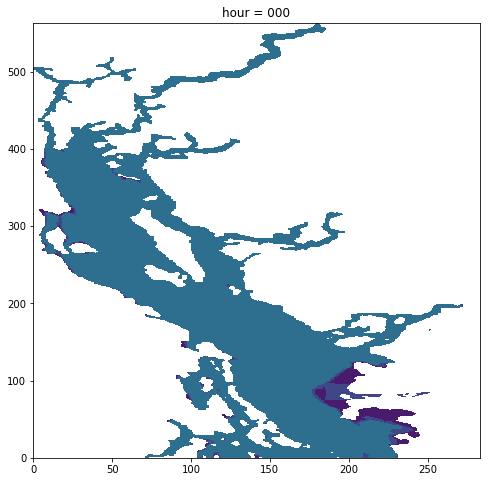

In [49]:
animate_one_density(Jun04, 1023.3)

In [50]:
JunW04 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/LakeJun-0.4/SalishSea_1h_20160601_20160607_grid_T.nc')

# June, vtau = -0.4

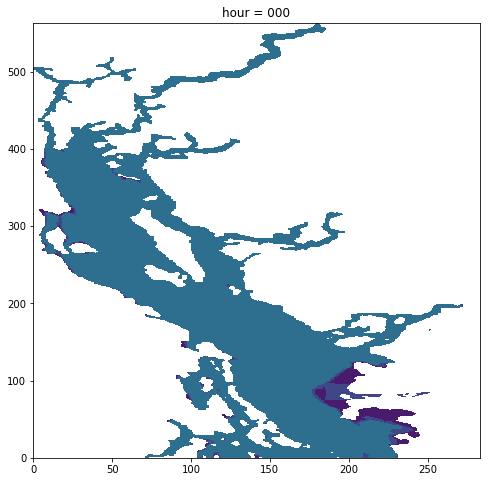

In [51]:
animate_one_density(JunW04, 1023.3)

# January, vtau = 0.4

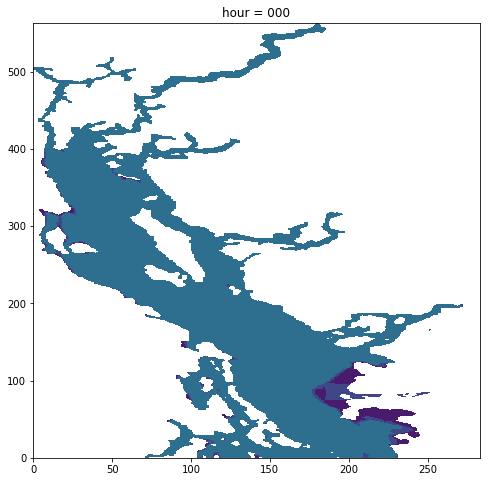

In [52]:
animate_one_density(Jan04, 1023.3)

# January, vtau = -0.4

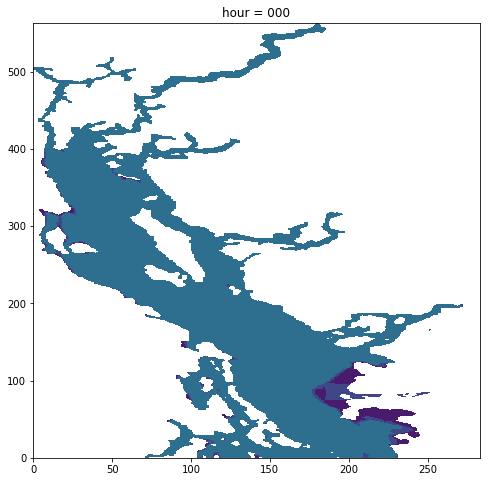

In [53]:
animate_one_density(JanW04, 1023.3)